In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pmdarima import auto_arima
from warnings import filterwarnings
filterwarnings("ignore")

In [54]:
df = pd.read_csv("/Users/pm3796gb/Downloads/SNAP (1).csv")

# This function show the first 10 columns of the data frame

In [201]:
def dataframe(dataframe):
    return dataframe.head(10)

In [202]:
#Apply dataframe function
dataframe(df)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-03-02,24.000000,26.049999,23.500000,24.480000,24.480000,217048900
1,2017-03-03,26.389999,29.440001,26.059999,27.090000,27.090000,148166400
2,2017-03-06,28.170000,28.250000,23.770000,23.770000,23.770000,72903000
3,2017-03-07,22.209999,22.500000,20.639999,21.440001,21.440001,71857800
4,2017-03-08,22.030001,23.430000,21.309999,22.809999,22.809999,49819100
5,2017-03-09,23.170000,23.680000,22.510000,22.709999,22.709999,25803200
6,2017-03-10,23.360001,23.400000,22.000000,22.070000,22.070000,18337600
7,2017-03-13,22.049999,22.150000,20.959999,21.090000,21.090000,20605900
8,2017-03-14,20.900000,20.980000,20.150000,20.580000,20.580000,20033200
9,2017-03-15,20.080000,21.400000,20.049999,20.770000,20.770000,24985900


# Convert the date into pandas date

In [57]:
def date(dataframe):
    dataframe['Date'] = pd.to_datetime(dataframe['Date'])
    return dataframe.head(10)

In [58]:
date(df)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-03-02,24.000000,26.049999,23.500000,24.480000,24.480000,217048900
1,2017-03-03,26.389999,29.440001,26.059999,27.090000,27.090000,148166400
2,2017-03-06,28.170000,28.250000,23.770000,23.770000,23.770000,72903000
3,2017-03-07,22.209999,22.500000,20.639999,21.440001,21.440001,71857800
4,2017-03-08,22.030001,23.430000,21.309999,22.809999,22.809999,49819100
5,2017-03-09,23.170000,23.680000,22.510000,22.709999,22.709999,25803200
6,2017-03-10,23.360001,23.400000,22.000000,22.070000,22.070000,18337600
7,2017-03-13,22.049999,22.150000,20.959999,21.090000,21.090000,20605900
8,2017-03-14,20.900000,20.980000,20.150000,20.580000,20.580000,20033200
9,2017-03-15,20.080000,21.400000,20.049999,20.770000,20.770000,24985900


# Set the index as the date

In [203]:
def setindex(dataframe):
    dataframe = dataframe.set_index("Date")
    dataframe=dataframe[['Close']]
    return dataframe.head(10)

In [204]:
setindex(df)

,Close
Date,
2017-03-02,24.480000
2017-03-03,27.090000
2017-03-06,23.770000
2017-03-07,21.440001
2017-03-08,22.809999
2017-03-09,22.709999
2017-03-10,22.070000
2017-03-13,21.090000
2017-03-14,20.580000


# Data Visualization

In [205]:
def vizdata(dataframe,title):
    sea.set_style("darkgrid")
    plt.figure(figsize=(15,9))
    plt.plot(dataframe["Close"],label='Close Price')
    plt.xlabel("Time",fontsize=20,weight='bold')
    plt.ylabel("Price",fontsize=20,weight='bold')
    plt.xticks(weight='bold',fontsize=14)
    plt.yticks(weight='bold',fontsize=14)
    plt.title(title)
    plt.legend(loc='best')
    plt.show()

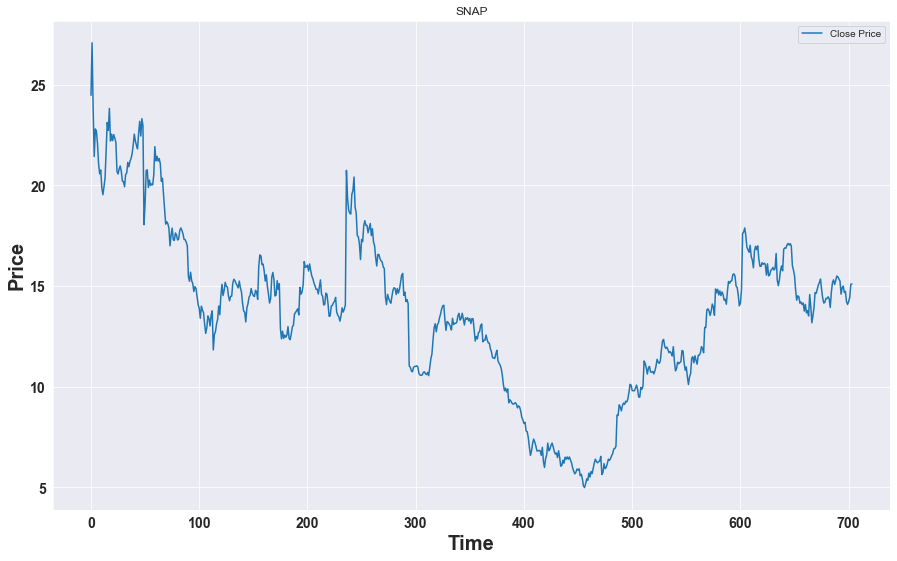

In [206]:
vizdata(df,"SNAP")

# Decomposition of the time series

In [207]:
def decompose(dataframe):
    result = seasonal_decompose(dataframe["Close"],freq=24)
    fig = result.plot()
    fig.set_size_inches(17,9)
    fig.show()

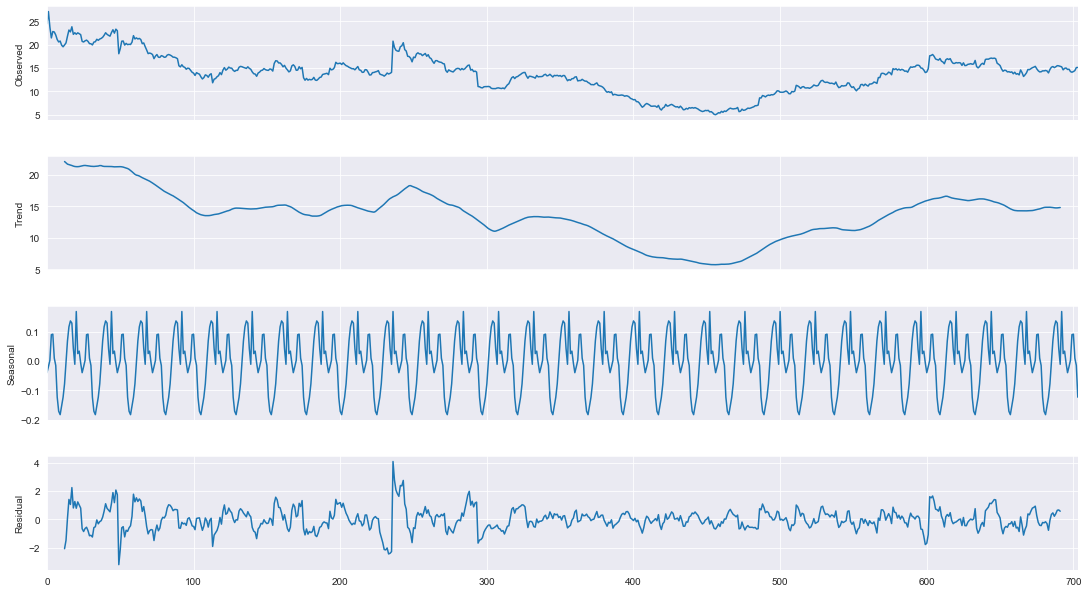

In [208]:
decompose(df)

# Take a look at the autocorrelation and partial autocorrelation

In [209]:
def autocorrelation(dataframe):
    plot_acf(dataframe['Close'])
    plot_pacf(dataframe['Close'])

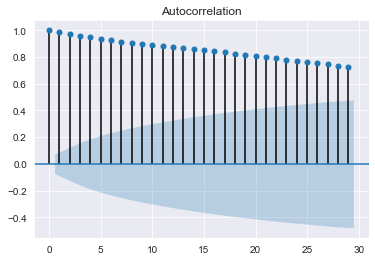

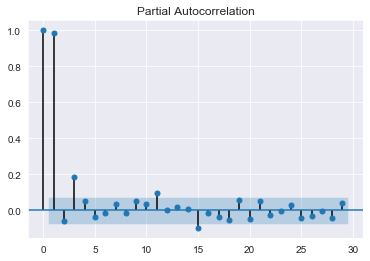

In [210]:
autocorrelation(df)

# AutoARIMA model

In [233]:
def autoArima(dataframe,p,d,q):
    autoarima = auto_arima(dataframe['Close'],start_p=1, start_q=1,
                           max_p=p, max_q=q, m=24,
                           start_P=0, seasonal=True,
                           d=d, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
    print(autoarima.aic())
    print(autoarima.summary())
    mod = autoarima.fit(train)
    return mod

# create your own train and test data set

In [214]:
size = 690
train = df['Close'][:size]
test = df[size:]

In [215]:
len(train)

690

In [216]:
len(test)

14

In [224]:
def fitmodel_autoarima(train):
    model= mod.fit(train)
    return model

In [228]:
help(autoArima)

Help on function autoArima in module __main__:

autoArima(dataframe, p, d, q)



In [300]:
class Forecaster:
    ''' Import the tool for time series analysis'''
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sea
    from statsmodels.tsa.seasonal import seasonal_decompose
    from statsmodels.graphics.tsaplots import plot_acf
    from statsmodels.graphics.tsaplots import plot_pacf
    
    
    def dataframe(self,df):
        '''show the 10 first colimns of the dataframe '''
        self.df = df
        return df.head(10)
    
    def date(self,df):
        '''set the date as a pandas date '''
        self.df = df
        df['Date'] = pd.to_datetime(df['Date'])
        return df.head(10)
    
    def setindex(self,df):
        ''' set the index as date for time series analysis'''
        self.df = df
        df = df.set_index("Date")
        df=df[['Close']]
        return df.head(10)
    
    def vizdata(self,df,title):
        '''visualize the data '''
        self.df=df
        df = df.set_index("Date")
        self.title = title
        sea.set_style("darkgrid")
        plt.figure(figsize=(15,9))
        plt.plot(df["Close"],label='Close Price')
        plt.xlabel("Time",fontsize=20,weight='bold')
        plt.ylabel("Price",fontsize=20,weight='bold')
        plt.xticks(weight='bold',fontsize=14)
        plt.yticks(weight='bold',fontsize=14)
        plt.title(title)
        plt.legend(loc='best')
        plt.show()
        
    def decompose(self,df):
        ''' decomposition of the time serie'''
        self.df = df
        df = df.set_index("Date")
        result = seasonal_decompose(df["Close"],freq=24)
        fig = result.plot()
        fig.set_size_inches(17,9)
        #
        fig.show()

In [294]:
forecast = Forecaster()

In [295]:
forecast.dataframe(df)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-03-02,24.000000,26.049999,23.500000,24.480000,24.480000,217048900
1,2017-03-03,26.389999,29.440001,26.059999,27.090000,27.090000,148166400
2,2017-03-06,28.170000,28.250000,23.770000,23.770000,23.770000,72903000
3,2017-03-07,22.209999,22.500000,20.639999,21.440001,21.440001,71857800
4,2017-03-08,22.030001,23.430000,21.309999,22.809999,22.809999,49819100
5,2017-03-09,23.170000,23.680000,22.510000,22.709999,22.709999,25803200
6,2017-03-10,23.360001,23.400000,22.000000,22.070000,22.070000,18337600
7,2017-03-13,22.049999,22.150000,20.959999,21.090000,21.090000,20605900
8,2017-03-14,20.900000,20.980000,20.150000,20.580000,20.580000,20033200
9,2017-03-15,20.080000,21.400000,20.049999,20.770000,20.770000,24985900


In [296]:
forecast.date(df)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-03-02,24.000000,26.049999,23.500000,24.480000,24.480000,217048900
1,2017-03-03,26.389999,29.440001,26.059999,27.090000,27.090000,148166400
2,2017-03-06,28.170000,28.250000,23.770000,23.770000,23.770000,72903000
3,2017-03-07,22.209999,22.500000,20.639999,21.440001,21.440001,71857800
4,2017-03-08,22.030001,23.430000,21.309999,22.809999,22.809999,49819100
5,2017-03-09,23.170000,23.680000,22.510000,22.709999,22.709999,25803200
6,2017-03-10,23.360001,23.400000,22.000000,22.070000,22.070000,18337600
7,2017-03-13,22.049999,22.150000,20.959999,21.090000,21.090000,20605900
8,2017-03-14,20.900000,20.980000,20.150000,20.580000,20.580000,20033200
9,2017-03-15,20.080000,21.400000,20.049999,20.770000,20.770000,24985900


In [297]:
forecast.setindex(df)

,Close
Date,
2017-03-02,24.480000
2017-03-03,27.090000
2017-03-06,23.770000
2017-03-07,21.440001
2017-03-08,22.809999
2017-03-09,22.709999
2017-03-10,22.070000
2017-03-13,21.090000
2017-03-14,20.580000


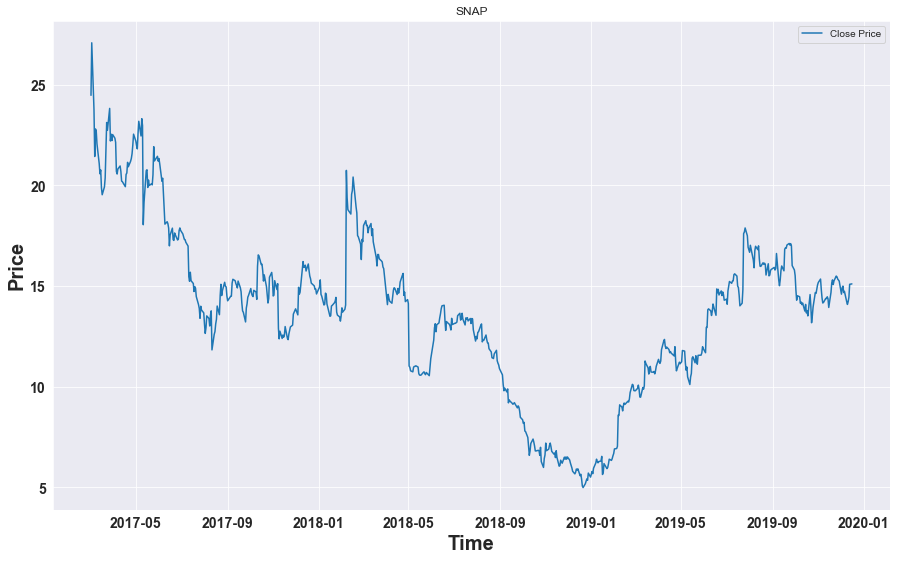

In [298]:
forecast.vizdata(df,'SNAP')

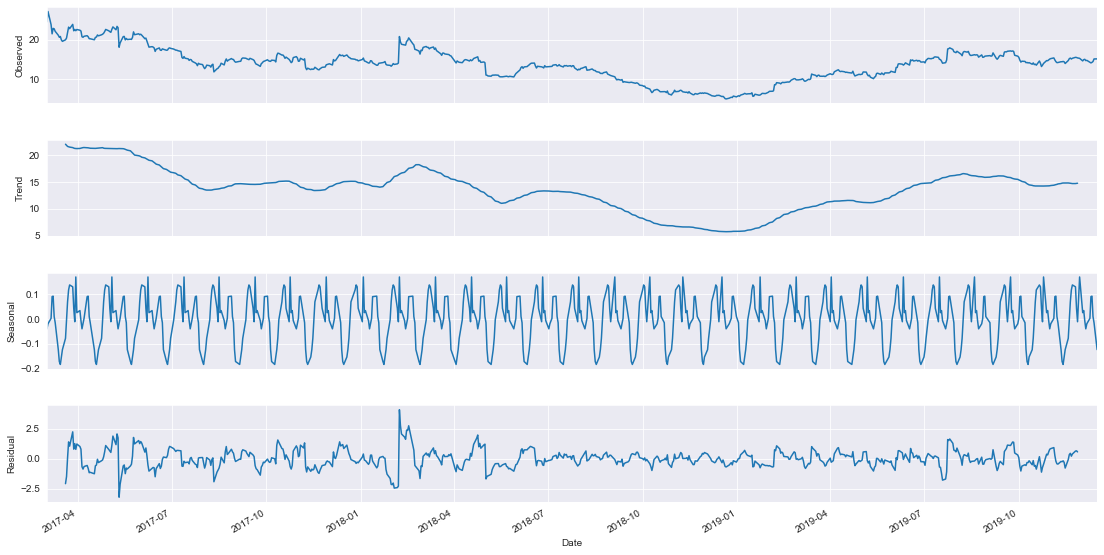

In [299]:
forecast.decompose(df)